<a href="https://colab.research.google.com/github/dolmani38/ai_corona/blob/master/ai_corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Apr 30 11:25:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
rm1 = pd.read_csv("./corona_contest_data_0406/2. Roaming_data.csv")
rm2 = pd.read_csv("./corona_contest_data_0429/2. Roaming_data.csv")
rm = pd.concat([rm1, rm2], ignore_index=True, sort=False)

In [0]:
rm

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3
...,...,...,...,...,...
217800,20200401,vn,20200330,20200401,3
217801,20200401,vn,20200331,20200331,20
217802,20200401,vn,20200331,20200401,6
217803,20200401,vn,20200401,20200401,45


In [0]:
ar = pd.DataFrame(rm.groupby('arrival')['count'].sum())
ar['date'] =  ar.index.astype('object')
ar['date'] =  pd.to_datetime(ar['date'], format='%Y%m%d')

In [0]:
ar

,count,date
arrival,,
20191031,91,2019-10-31
20191101,36,2019-11-01
20191102,120,2019-11-02
20191103,159,2019-11-03
20191104,179,2019-11-04
...,...,...
20200424,711,2020-04-24
20200425,463,2020-04-25
20200426,447,2020-04-26


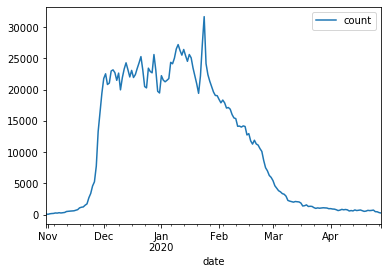

In [0]:
ar.plot(x='date',y='count')

In [0]:
iso = rm['iso'].unique()
iso

array(['ad', 'ae', 'af', 'am', 'ao', 'ar', 'at', 'au', 'az', 'ba', 'bd',
       'be', 'bg', 'bh', 'bn', 'bo', 'br', 'bw', 'by', 'ca', 'ch', 'cl',
       'cn', 'co', 'cy', 'cz', 'de', 'dk', 'dz', 'ec', 'ee', 'eg', 'es',
       'et', 'fi', 'fj', 'fr', 'ga', 'gb', 'ge', 'gh', 'gr', 'gu', 'hk',
       'hr', 'ht', 'hu', 'id', 'ie', 'il', 'in', 'iq', 'ir', 'it', 'jm',
       'jo', 'jp', 'ke', 'kg', 'kh', 'kw', 'kz', 'la', 'lk', 'ls', 'lt',
       'lu', 'lv', 'ma', 'mc', 'me', 'mk', 'mm', 'mn', 'mo', 'mp', 'mt',
       'mu', 'mv', 'mx', 'my', 'mz', nan, 'na', 'ng', 'ni', 'nl', 'no',
       'np', 'nz', 'om', 'pa', 'pe', 'pg', 'ph', 'pk', 'pl', 'ps', 'pt',
       'py', 'qa', 'ro', 'rs', 'ru', 'rw', 'sa', 'sc', 'sd', 'se', 'sg',
       'si', 'sk', 'sr', 'sv', 'th', 'tm', 'tr', 'tw', 'tz', 'ug', 'us',
       'uy', 'uz', 'vn', 'za', 'zm', 'zw', 'al', 'bz', 'cr', 'gt', 'hn',
       'is', 'lb', 'md', 'tk', 'ua', 'li', 'mg', 'an', 'do', 'pr', 'to',
       'tt', 'cm', 'pf', 'tg', 'tn', 'vu', 'bj', 'bt

In [0]:
ar_iso = pd.DataFrame(rm.groupby(['arrival','iso'])['count'].sum())
ar_iso

count
arrival  iso       
20191031 ae       3
         at       3
         cn      20
         de       3
         hk       6
...             ...
20200428 th      13
         tw       5
         us      13
         uy       3
         vn      25

[15358 rows x 1 columns]

In [0]:
ts = pd.DataFrame()
date = None
for row in ar_iso.iterrows():
    ts['date'] = row[0][0]
    ts[row[0][1]] = row[1][0]
    
ts

,date,ae,at,cn,de,hk,jp,kh,kw,la,...,cf,tc,ls,td,mr,to,ws,gm,ye,ml


In [0]:
ns1 = pd.read_excel("./corona_contest_data_0406/3-1. NewsList.xls")
ns2 = pd.read_excel("./corona_contest_data_0429/3-1. NewList.xls")
ns =pd.concat([ns1, ns2], ignore_index=True, sort=False)

In [0]:
ns

,파일명,제목,URL,수집일자,게시일자,채널명,감염병명,분류명
0,AFRO2019120200003,WHO supports Angola’s Government efforts to en...,https://www.afro.who.int/news/who-supports-ang...,2019-12-02 21:00:16.0,2019-12-02 00:00:00,AFRO,Poliomyelitis,Viral
1,AFRO2019120300001,African First Ladies laud progress against HIV...,https://www.afro.who.int/news/african-first-la...,2019-12-03 00:00:17.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
2,AFRO2019120300002,Eritrea Observed World AIDS Day 2019,https://www.afro.who.int/news/eritrea-observed...,2019-12-03 00:00:18.0,2019-12-02 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
3,AFRO2019120400003,West and Central Africa Expands Access to HIV ...,https://www.afro.who.int/news/west-and-central...,2019-12-04 03:00:14.0,2019-12-03 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
4,AFRO2019120400004,Nearly 23 million voluntary male medical circu...,https://www.afro.who.int/news/nearly-23-millio...,2019-12-04 22:00:14.0,2019-12-04 00:00:00,AFRO,Acquired immuno deficiency syndrome,Viral
...,...,...,...,...,...,...,...,...
103822,XWFB2020040900020,"Ching Ming remembrance, home country forever! ...",http://wsjkw.sh.gov.cn/xwfb/20200404/2f54e0e14...,2020-04-09 16:05:21.0,2020-04-04 00:00:00,Shanghai Municioal Health Commission,COVID-19,Viral
103823,ZWYW2020041000002,Guangdong Provincial Health Commission notifie...,http://wsjkw.gd.gov.cn/zwyw_yqxx/content/post_...,2020-04-10 18:00:45.0,2020-04-10 00:00:00,Health Commission of Guangdong Province,Dengue fever,Viral
103824,ZWYW2020041500002,Guangdong Provincial Health Commission announc...,http://wsjkw.gd.gov.cn/zwyw_yqxx/content/post_...,2020-04-15 23:01:04.0,2020-04-15 00:00:00,Health Commission of Guangdong Province,Influenza,Viral
103825,ZWYW2020041500003,Guangdong Provincial Health Commission release...,http://wsjkw.gd.gov.cn/zwyw_yqxx/content/post_...,2020-04-15 23:01:13.0,2020-04-15 00:00:00,Health Commission of Guangdong Province,Influenza,Viral


In [0]:
cov_news = ns.loc[ns['감염병명'] == 'COVID-19']
cov_news['게시일자'] =  cov_news['게시일자'].str[:10]
cov_news = pd.DataFrame(cov_news.groupby('게시일자')['감염병명'].count())
cov_news = cov_news.loc[cov_news.index >= '2019-10-31']
cov_news['date'] = pd.to_datetime(cov_news.index, format='%Y-%m-%d')

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
cov_news = cov_news.rename(columns={"감염병명":"buz_count"})
cov_news

,buz_count,date
게시일자,,
2019-12-01,1,2019-12-01
2019-12-14,2,2019-12-14
2019-12-30,3,2019-12-30
2019-12-31,5,2019-12-31
2020-01-02,1,2020-01-02
...,...,...
2020-04-26,1176,2020-04-26
2020-04-27,1353,2020-04-27
2020-04-28,999,2020-04-28


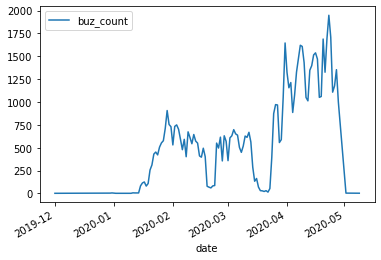

In [0]:
cov_news.plot(x='date',y='buz_count')

In [0]:
raw_ds = ar.set_index('date').join(cov_news.set_index('date'))
raw_ds = raw_ds.rename(columns={'count':'arrival_count'})
raw_ds.index = pd.to_datetime(raw_ds.index, format='%Y-%m-%d')
raw_ds['buz_count'].fillna(0, inplace=True)

In [0]:
raw_ds

,arrival_count,buz_count
date,,
2019-10-31,91,0.0
2019-11-01,36,0.0
2019-11-02,120,0.0
2019-11-03,159,0.0
2019-11-04,179,0.0
...,...,...
2020-04-24,711,1708.0
2020-04-25,463,1107.0
2020-04-26,447,1176.0


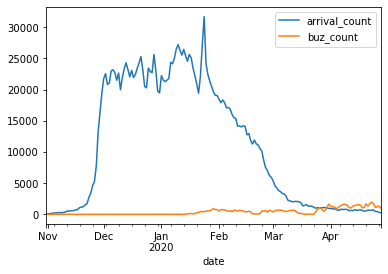

In [0]:
raw_ds.plot(y=['arrival_count','buz_count'])

In [0]:
raw_ds['arrival_14ma'] = raw_ds['arrival_count'].rolling(window=14, min_periods=0).mean()
raw_ds['news_14ma'] = raw_ds['buz_count'].rolling(window=14, min_periods=0).mean()


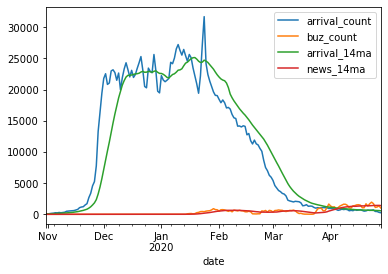

In [0]:
raw_ds.plot()

In [0]:
import numpy as np

#time-series의 window를 2주, 14일로 잡음
window = 7*2
#위의 차트에서 보는바와 같이 4개의 vector 사용
size = 4
#1일 후 예측
forecast = 1

data = raw_ds.to_numpy()
train_x = []
train_y = []

for i in range(data.shape[0]-window-forecast):
    sub = []
    for j in range(window):
        sub.append(data[i+j,:])
    train_x.append(sub)
    train_y.append(data[i + window + forecast-1][0])
    
train_x = np.asarray(train_x)
train_x = train_x.reshape(-1,window,size)
train_y = np.asarray(train_y)

In [0]:
train_x, train_y

(array([[[  91.        ,    0.        ,   91.        ,    0.        ],
         [  36.        ,    0.        ,   63.5       ,    0.        ],
         [ 120.        ,    0.        ,   82.33333333,    0.        ],
         ...,
         [ 487.        ,    0.        ,  227.66666667,    0.        ],
         [ 520.        ,    0.        ,  250.15384615,    0.        ],
         [ 551.        ,    0.        ,  271.64285714,    0.        ]],
 
        [[  36.        ,    0.        ,   63.5       ,    0.        ],
         [ 120.        ,    0.        ,   82.33333333,    0.        ],
         [ 159.        ,    0.        ,  101.5       ,    0.        ],
         ...,
         [ 520.        ,    0.        ,  250.15384615,    0.        ],
         [ 551.        ,    0.        ,  271.64285714,    0.        ],
         [ 567.        ,    0.        ,  305.64285714,    0.        ]],
 
        [[ 120.        ,    0.        ,   82.33333333,    0.        ],
         [ 159.        ,    0.        ,  10

In [0]:
import keras
from keras.layers import Dense, Activation, Flatten, Conv1D, MaxPooling1D
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(128,4, input_shape=(window, size),padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(64, 4,padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(32, 4,padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(),metrics=['mae'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 14, 128)           2176      
_________________________________________________________________
activation_13 (Activation)   (None, 14, 128)           0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 7, 128)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 7, 64)             32832     
_________________________________________________________________
activation_14 (Activation)   (None, 7, 64)             0         
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 3, 64)             0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 3, 32)            

In [0]:
hist = model.fit(train_x, train_y, epochs=1000,verbose=1)

Epoch 1/1000
166/166 [==============================] - 0s 1ms/step - loss: 72328864.9639 - mae: 6016.8105
Epoch 2/1000
166/166 [==============================] - 0s 385us/step - loss: 24006333.9759 - mae: 3714.1792
Epoch 3/1000
166/166 [==============================] - 0s 276us/step - loss: 14520893.4518 - mae: 2511.6855
Epoch 4/1000
166/166 [==============================] - 0s 222us/step - loss: 8878687.5904 - mae: 2092.7046
Epoch 5/1000
166/166 [==============================] - 0s 288us/step - loss: 5420715.6386 - mae: 1452.4696
Epoch 6/1000
166/166 [==============================] - 0s 234us/step - loss: 4755661.1325 - mae: 1371.1071
Epoch 7/1000
166/166 [==============================] - 0s 523us/step - loss: 4295558.8163 - mae: 1303.8478
Epoch 8/1000
166/166 [==============================] - 0s 270us/step - loss: 3948389.1807 - mae: 1243.5725
Epoch 9/1000
166/166 [==============================] - 0s 246us/step - loss: 3601251.9367 - mae: 1162.3611
Epoch 10/1000
166/166 [====

166/166 [==============================] - 0s 469us/step - loss: 937335.3065 - mae: 523.6553
Epoch 152/1000
166/166 [==============================] - 0s 204us/step - loss: 1148416.2432 - mae: 605.3165
Epoch 153/1000
166/166 [==============================] - 0s 204us/step - loss: 1100926.4789 - mae: 624.2961
Epoch 154/1000
166/166 [==============================] - 0s 210us/step - loss: 838564.2353 - mae: 515.4529
Epoch 155/1000
166/166 [==============================] - 0s 294us/step - loss: 964508.9040 - mae: 576.4313
Epoch 156/1000
166/166 [==============================] - 0s 288us/step - loss: 833466.8121 - mae: 549.8055
Epoch 157/1000
166/166 [==============================] - 0s 300us/step - loss: 753698.9608 - mae: 498.8075
Epoch 158/1000
166/166 [==============================] - 0s 210us/step - loss: 823714.5858 - mae: 515.7404
Epoch 159/1000
166/166 [==============================] - 0s 246us/step - loss: 749479.4932 - mae: 482.2546
Epoch 160/1000
166/166 [=================

166/166 [==============================] - 0s 228us/step - loss: 487526.9362 - mae: 410.8967
Epoch 302/1000
166/166 [==============================] - 0s 216us/step - loss: 602265.7169 - mae: 516.0215
Epoch 303/1000
166/166 [==============================] - 0s 258us/step - loss: 628974.3840 - mae: 479.5333
Epoch 304/1000
166/166 [==============================] - 0s 234us/step - loss: 471175.7218 - mae: 400.4115
Epoch 305/1000
166/166 [==============================] - 0s 318us/step - loss: 418302.9938 - mae: 370.2711
Epoch 306/1000
166/166 [==============================] - 0s 270us/step - loss: 439094.1502 - mae: 406.0220
Epoch 307/1000
166/166 [==============================] - 0s 276us/step - loss: 429958.9503 - mae: 389.8422
Epoch 308/1000
166/166 [==============================] - 0s 234us/step - loss: 506617.0945 - mae: 437.6595
Epoch 309/1000
166/166 [==============================] - 0s 258us/step - loss: 588655.8099 - mae: 509.5503
Epoch 310/1000
166/166 [===================

Epoch 377/1000
166/166 [==============================] - 0s 258us/step - loss: 234398.9689 - mae: 291.9588
Epoch 378/1000
166/166 [==============================] - 0s 210us/step - loss: 210261.7988 - mae: 269.0806
Epoch 379/1000
166/166 [==============================] - 0s 288us/step - loss: 267522.5188 - mae: 326.0485
Epoch 380/1000
166/166 [==============================] - 0s 252us/step - loss: 238406.9317 - mae: 287.0500
Epoch 381/1000
166/166 [==============================] - 0s 288us/step - loss: 300266.4443 - mae: 330.3040
Epoch 382/1000
166/166 [==============================] - 0s 300us/step - loss: 210146.1886 - mae: 276.5081
Epoch 383/1000
166/166 [==============================] - 0s 294us/step - loss: 189547.5080 - mae: 258.2127
Epoch 384/1000
166/166 [==============================] - 0s 282us/step - loss: 332945.2206 - mae: 359.4271
Epoch 385/1000
166/166 [==============================] - 0s 252us/step - loss: 307959.8183 - mae: 329.8535
Epoch 386/1000
166/166 [====

166/166 [==============================] - 0s 282us/step - loss: 146184.5506 - mae: 254.3447
Epoch 528/1000
166/166 [==============================] - 0s 288us/step - loss: 181828.4977 - mae: 283.7213
Epoch 529/1000
166/166 [==============================] - 0s 276us/step - loss: 179660.5708 - mae: 289.6576
Epoch 530/1000
166/166 [==============================] - 0s 282us/step - loss: 200338.1781 - mae: 288.7040
Epoch 531/1000
166/166 [==============================] - 0s 198us/step - loss: 231555.3095 - mae: 330.4615
Epoch 532/1000
166/166 [==============================] - 0s 246us/step - loss: 189700.0331 - mae: 280.7994
Epoch 533/1000
166/166 [==============================] - 0s 240us/step - loss: 137030.1344 - mae: 240.8370
Epoch 534/1000
166/166 [==============================] - 0s 312us/step - loss: 136849.0277 - mae: 247.2496
Epoch 535/1000
166/166 [==============================] - 0s 288us/step - loss: 140451.1768 - mae: 245.8006
Epoch 536/1000
166/166 [===================

166/166 [==============================] - 0s 385us/step - loss: 104737.6322 - mae: 195.3611
Epoch 678/1000
166/166 [==============================] - 0s 240us/step - loss: 82689.3372 - mae: 173.4113
Epoch 679/1000
166/166 [==============================] - 0s 348us/step - loss: 73011.5605 - mae: 162.0451
Epoch 680/1000
166/166 [==============================] - 0s 264us/step - loss: 83103.2827 - mae: 172.3649
Epoch 681/1000
166/166 [==============================] - 0s 264us/step - loss: 71347.8462 - mae: 151.0223
Epoch 682/1000
166/166 [==============================] - 0s 252us/step - loss: 65775.1237 - mae: 140.6570
Epoch 683/1000
166/166 [==============================] - 0s 252us/step - loss: 74895.2261 - mae: 164.6743
Epoch 684/1000
166/166 [==============================] - 0s 246us/step - loss: 99683.6433 - mae: 201.2721
Epoch 685/1000
166/166 [==============================] - 0s 276us/step - loss: 71898.5712 - mae: 166.0792
Epoch 686/1000
166/166 [===========================

166/166 [==============================] - 0s 306us/step - loss: 57774.4870 - mae: 155.4125
Epoch 830/1000
166/166 [==============================] - 0s 348us/step - loss: 66895.2897 - mae: 168.2215
Epoch 831/1000
166/166 [==============================] - 0s 294us/step - loss: 85543.3564 - mae: 187.5503
Epoch 832/1000
166/166 [==============================] - 0s 288us/step - loss: 86470.7928 - mae: 197.0820
Epoch 833/1000
166/166 [==============================] - 0s 282us/step - loss: 52559.6855 - mae: 143.2639
Epoch 834/1000
166/166 [==============================] - 0s 348us/step - loss: 40496.9799 - mae: 120.5257
Epoch 835/1000
166/166 [==============================] - 0s 361us/step - loss: 40988.7687 - mae: 120.3079
Epoch 836/1000
166/166 [==============================] - 0s 276us/step - loss: 38323.8725 - mae: 117.1901
Epoch 837/1000
166/166 [==============================] - 0s 288us/step - loss: 32150.5453 - mae: 103.5964
Epoch 838/1000
166/166 [============================

166/166 [==============================] - 0s 264us/step - loss: 72959.5937 - mae: 175.5778
Epoch 982/1000
166/166 [==============================] - 0s 210us/step - loss: 60078.6933 - mae: 145.7040
Epoch 983/1000
166/166 [==============================] - 0s 258us/step - loss: 68746.9112 - mae: 177.3062
Epoch 984/1000
166/166 [==============================] - 0s 222us/step - loss: 75114.0591 - mae: 184.4824
Epoch 985/1000
166/166 [==============================] - 0s 276us/step - loss: 73250.3489 - mae: 180.6567
Epoch 986/1000
166/166 [==============================] - 0s 264us/step - loss: 45852.6873 - mae: 140.3762
Epoch 987/1000
166/166 [==============================] - 0s 300us/step - loss: 42187.0773 - mae: 134.2462
Epoch 988/1000
166/166 [==============================] - 0s 324us/step - loss: 39527.4722 - mae: 124.9649
Epoch 989/1000
166/166 [==============================] - 0s 294us/step - loss: 41933.0025 - mae: 133.2906
Epoch 990/1000
166/166 [============================

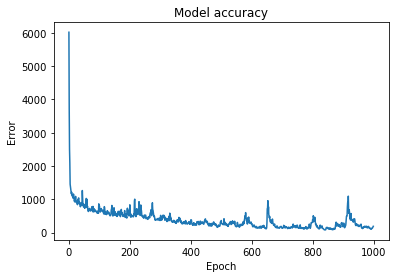

In [0]:
#plt.plot(hist.history['loss'])
plt.plot(hist.history['mae'])
plt.title('Model accuracy')
plt.ylabel('Error')
plt.xlabel('Epoch')
#plt.legend(['loss', 'mae'], loc='upper left')
plt.show()

In [0]:
predit_y = model.predict(train_x)
predit_y = predit_y.ravel()

In [0]:
predit_y = np.concatenate((np.zeros(window+ forecast), predit_y), axis=0)
print(data.shape)
print(predit_y.shape)

(181, 4)
(181,)


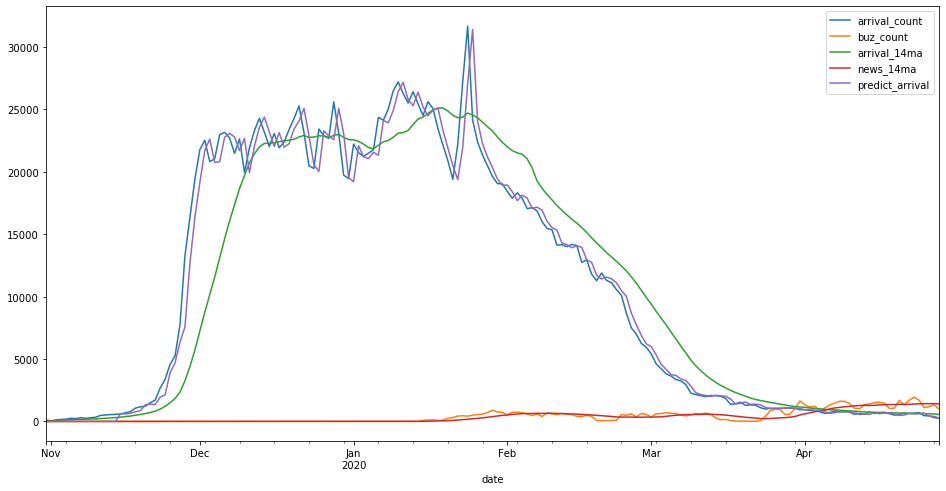

In [0]:
raw_ds['predict_arrival'] = predit_y
raw_ds.plot(figsize=(16,8))

In [0]:
raw_ds

,arrival_count,buz_count,arrival_14ma,news_14ma,predict_arrival
date,,,,,
2019-10-31,91,0.0,91.000000,0.000000,0.000000
2019-11-01,36,0.0,63.500000,0.000000,0.000000
2019-11-02,120,0.0,82.333333,0.000000,0.000000
2019-11-03,159,0.0,101.500000,0.000000,0.000000
2019-11-04,179,0.0,117.000000,0.000000,0.000000
...,...,...,...,...,...
2020-04-24,711,1708.0,638.071429,1413.857143,621.761292
2020-04-25,463,1107.0,630.642857,1418.000000,673.133362
2020-04-26,447,1176.0,616.785714,1429.714286,432.353455


In [0]:
#2020-04-29의 예측
test_x = raw_ds.iloc[raw_ds.shape[0] - window:raw_ds.shape[0],0:4].to_numpy()
test_x = test_x.reshape(-1,window,size)
predit_y = model.predict(test_x)
predit_y = predit_y.ravel()
print('arrival count prediction at 2020-04-29:',int(predit_y[0]))

arrival count prediction at 2020-04-29: 435


In [0]:
from lime import lime_tabular, lime_text
fn = np.asarray([['arrival_count_'+str(i),'buz_count_'+str(i),'arrival_14ma_'+str(i),'news_14ma_'+str(i)] for i in range(window)]).reshape(window*size)


In [0]:
fn

array(['arrival_count_0', 'buz_count_0', 'arrival_14ma_0', 'news_14ma_0',
       'arrival_count_1', 'buz_count_1', 'arrival_14ma_1', 'news_14ma_1',
       'arrival_count_2', 'buz_count_2', 'arrival_14ma_2', 'news_14ma_2',
       'arrival_count_3', 'buz_count_3', 'arrival_14ma_3', 'news_14ma_3',
       'arrival_count_4', 'buz_count_4', 'arrival_14ma_4', 'news_14ma_4',
       'arrival_count_5', 'buz_count_5', 'arrival_14ma_5', 'news_14ma_5',
       'arrival_count_6', 'buz_count_6', 'arrival_14ma_6', 'news_14ma_6',
       'arrival_count_7', 'buz_count_7', 'arrival_14ma_7', 'news_14ma_7',
       'arrival_count_8', 'buz_count_8', 'arrival_14ma_8', 'news_14ma_8',
       'arrival_count_9', 'buz_count_9', 'arrival_14ma_9', 'news_14ma_9',
       'arrival_count_10', 'buz_count_10', 'arrival_14ma_10',
       'news_14ma_10', 'arrival_count_11', 'buz_count_11',
       'arrival_14ma_11', 'news_14ma_11', 'arrival_count_12',
       'buz_count_12', 'arrival_14ma_12', 'news_14ma_12',
       'arrival_cou

In [0]:
lime_explainer = lime_tabular.LimeTabularExplainer(train_x.reshape(-1, window*size),
        training_labels=train_y,
        feature_names=fn,
        class_names=['arrival_count'] ,
        mode='regression')

In [0]:
test_x = test_x.reshape(window*size)

def predict(data):
    data = data.reshape(-1,window,size)
    return model.predict(data)

exp = lime_explainer.explain_instance(test_x, predict, num_features=20)

In [0]:
exp.show_in_notebook(show_table=True)